In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("TCPSD_dataset_train.csv", delimiter = ',')

In [4]:
df.head()
df.columns

Index(['k_f1', 'k_f2', 'k_m', 'ar_f', 'w_f', 'rho_f', 'rho_m', 'a11', 'a22',
       'a12', 'a13', 'a23', 'k11', 'k12', 'k13', 'k22', 'k23', 'k33'],
      dtype='object')

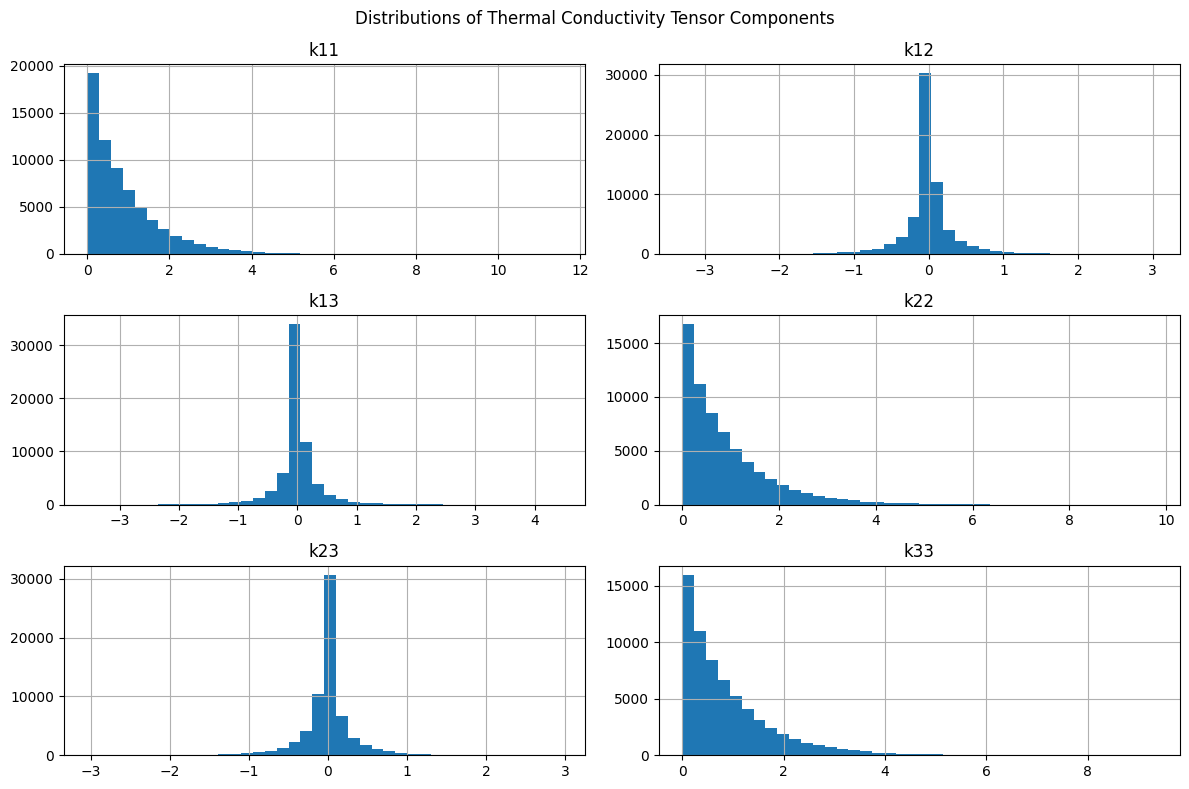

In [5]:
outputs = ['k11','k12','k13','k22','k23','k33']

df[outputs].hist(bins=40, figsize=(12,8))
plt.suptitle("Distributions of Thermal Conductivity Tensor Components")
plt.tight_layout()
plt.show()


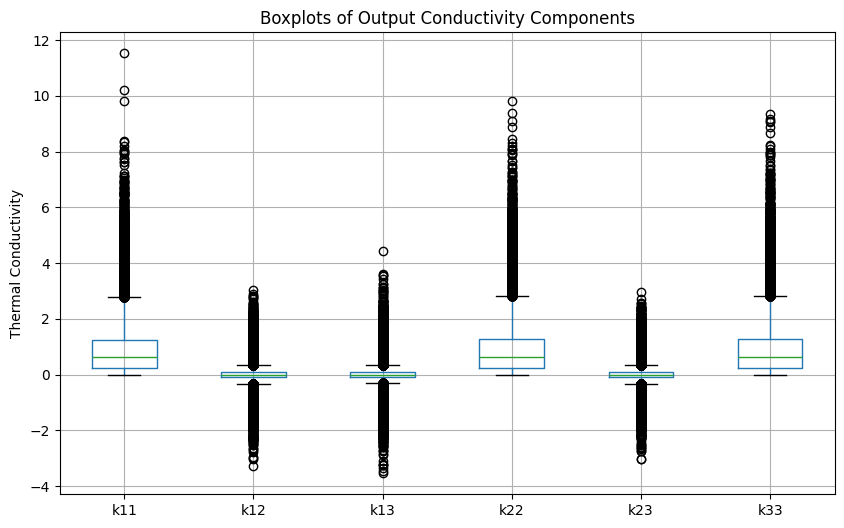

In [6]:
plt.figure(figsize=(10,6))
df[outputs].boxplot()
plt.title("Boxplots of Output Conductivity Components")
plt.ylabel("Thermal Conductivity")
plt.show()


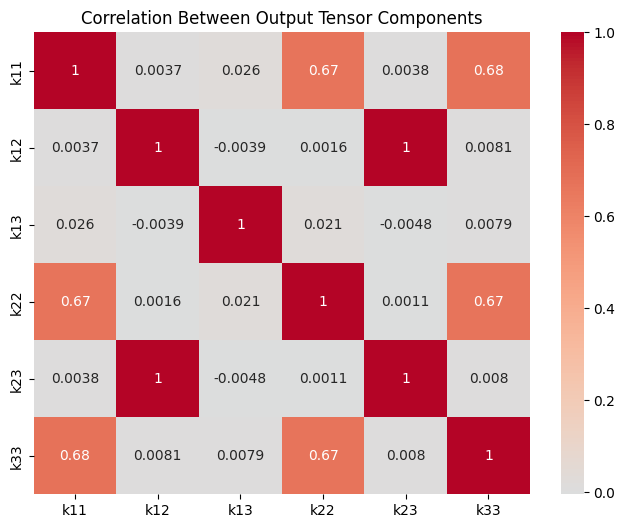

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df[outputs].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Output Tensor Components")
plt.show()

# check if all of the tensors are positive definite

In [8]:
import numpy as np

def is_spd(row):
    K = np.array([[row.k11, row.k12, row.k13],
                  [row.k12, row.k22, row.k23],
                  [row.k13, row.k23, row.k33]])
    return np.all(np.linalg.eigvals(K) > 0)

df['SPD'] = df.apply(is_spd, axis=1)
print("Fraction of physically valid tensors:", df['SPD'].mean())

Fraction of physically valid tensors: 1.0


### Lets look at the inputs now

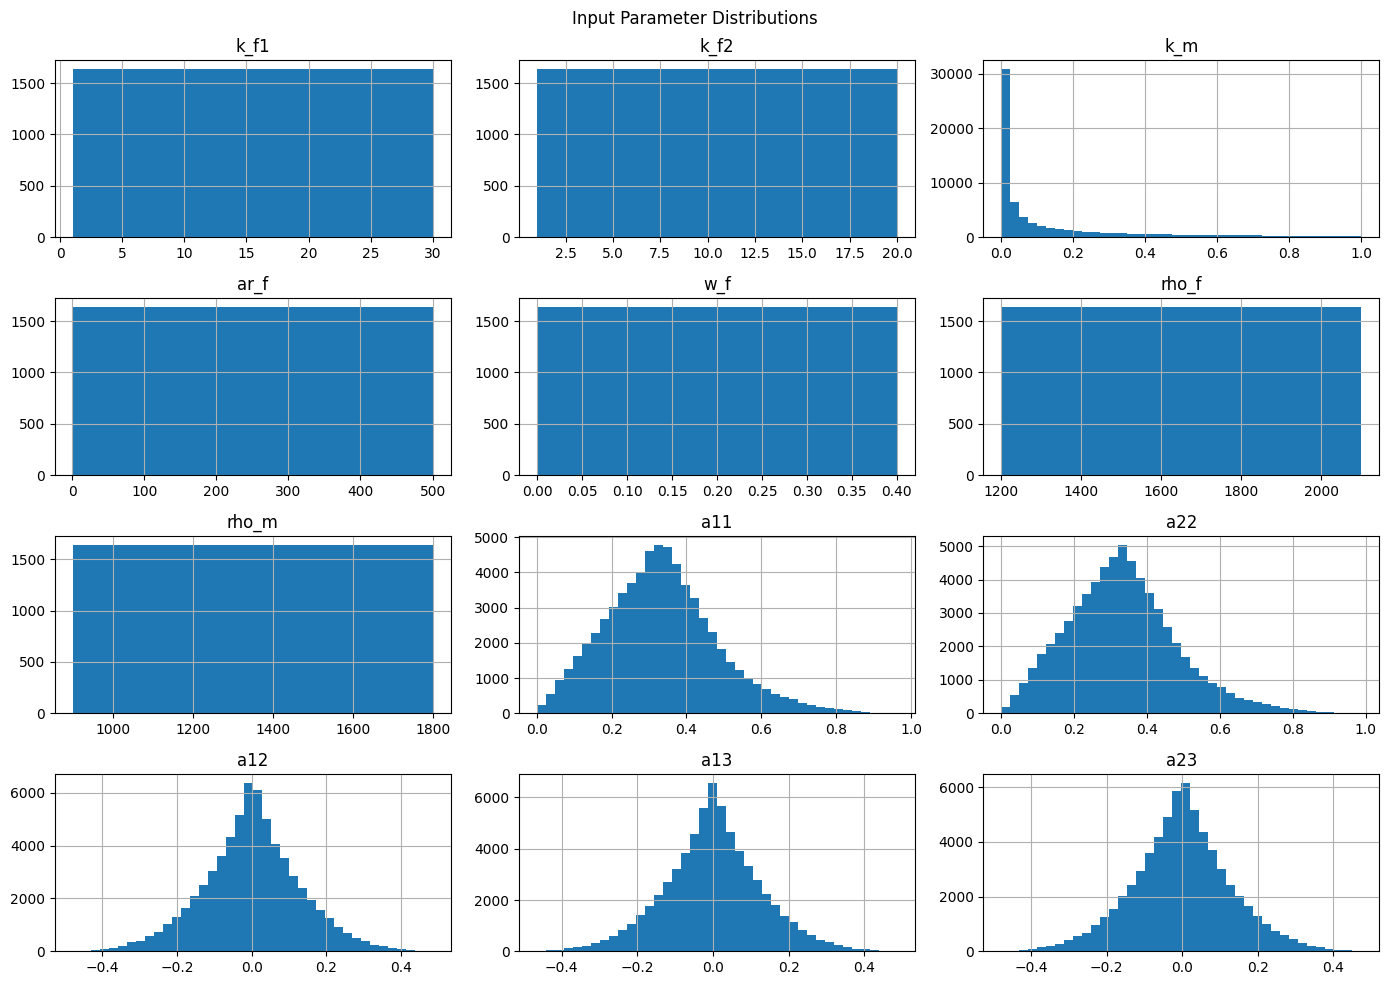

In [9]:
import matplotlib.pyplot as plt

inputs = ['k_f1','k_f2','k_m','ar_f','w_f','rho_f','rho_m',
          'a11','a22','a12','a13','a23']

df[inputs].hist(bins=40, figsize=(14,10))
plt.suptitle("Input Parameter Distributions")
plt.tight_layout()
plt.show()

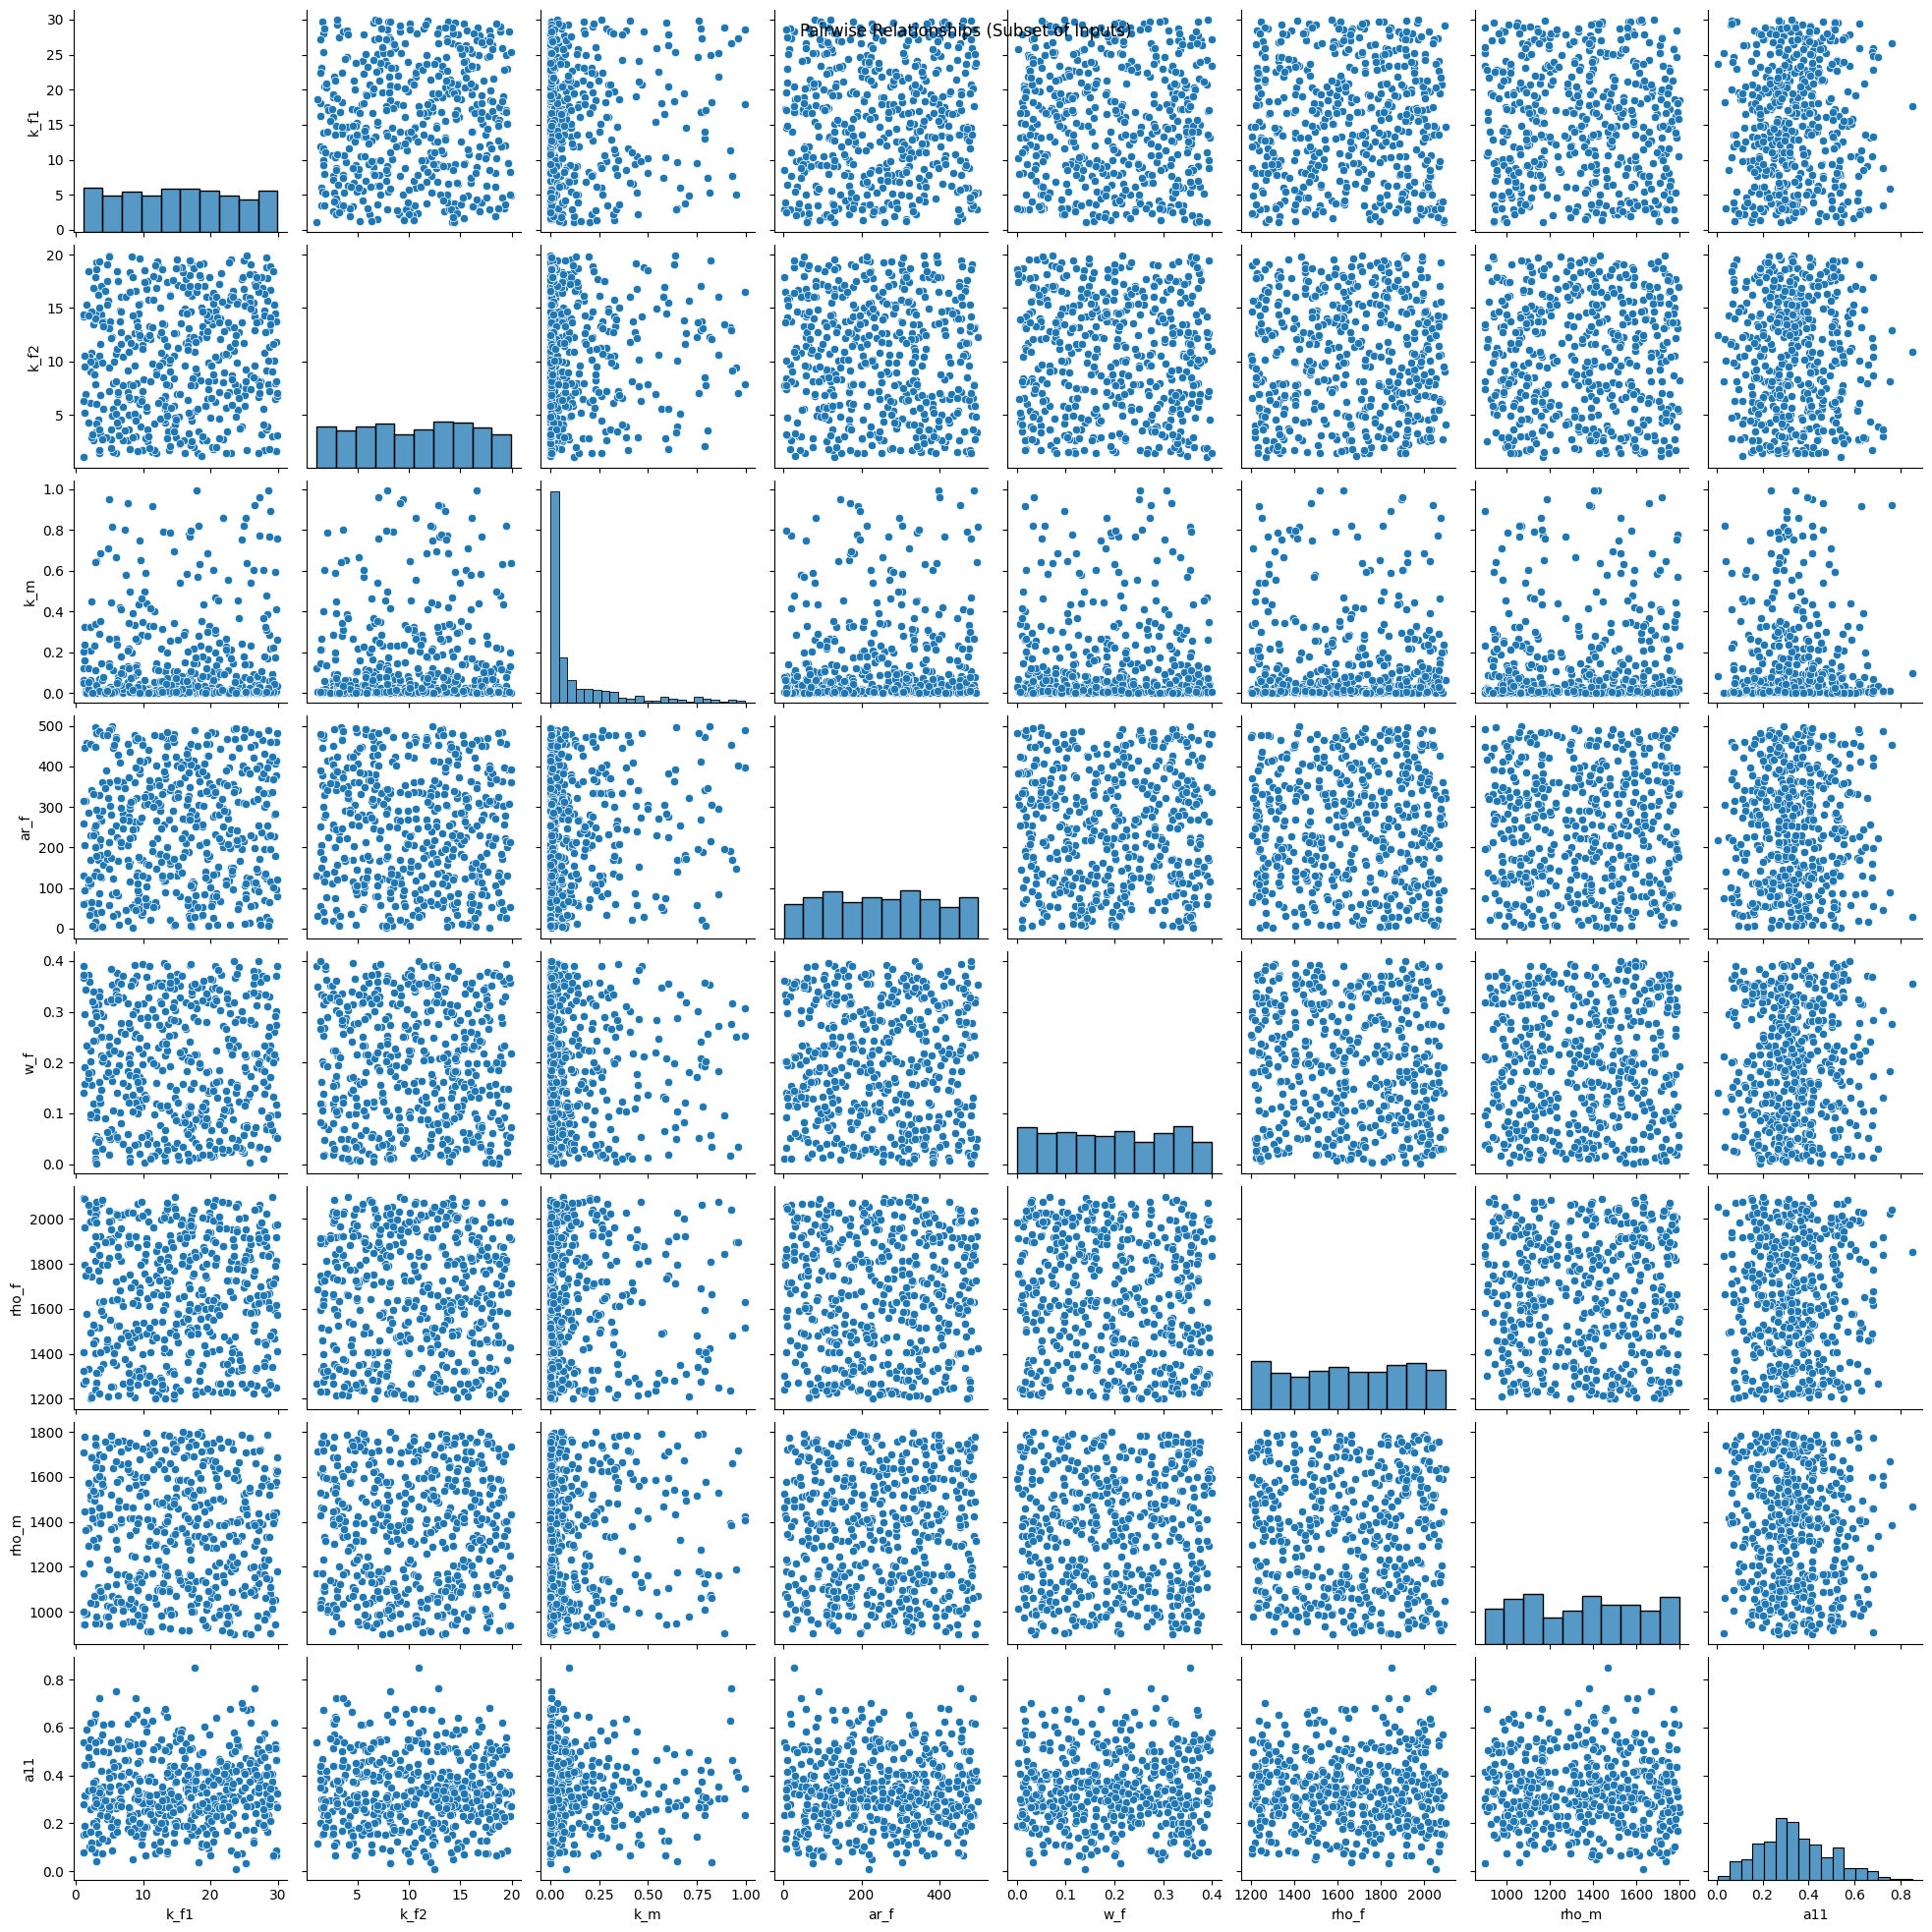

In [10]:

sample_df = df.sample(min(500, len(df)))  # avoid heavy plotting
sns.pairplot(sample_df[inputs[:8]])  # first 6 to keep readable
plt.suptitle("Pairwise Relationships (Subset of Inputs)")
plt.show()

In [12]:
print("Aspect ratio min:", df['ar_f'].min())

Aspect ratio min: 1.003583403580293


In [13]:
df['a33'] = 1 - df['a11'] - df['a22']
print("a33 min:", df['a33'].min())

a33 min: 2.451084054680419e-06


In [16]:
import numpy as np

def orientation_valid(row):
    A = np.array([[row.a11, row.a12, row.a13],
                  [row.a12, row.a22, row.a23],
                  [row.a13, row.a23, row.a33]])
    eigs = np.linalg.eigvals(A)
    return np.all(eigs >= -1e-3)  # allow tiny numerical noise

df['orient_valid'] = df.apply(orientation_valid, axis=1)
print("Fraction of valid orientation tensors:", df['orient_valid'].mean())

Fraction of valid orientation tensors: 0.1853790283203125


## This is an issue, lets first make all the code runnig for the surrogate and then we can revisit